In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.preprocessing import RobustScaler
pd.set_option('display.max_columns', 30)
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/media/abhishek/589E61B39E618A783/C-DAC Document/Practical Machine Learning/PML/Code/Dataset/creditcard.csv')

In [3]:
print("Non Fraud : ", round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print("Frauds : ", round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non Fraud :  99.83 % of the dataset
Frauds :  0.17 % of the dataset


In [4]:
print("Non Fraud ", round(df['Class'].value_counts()[0],2), ' are normal transaction')
print("Frauds ", round(df['Class'].value_counts()[1],2), ' are fraud')

Non Fraud  284315  are normal transaction
Frauds  492  are fraud


/home/abhishek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'class Distribution \n (0: No Fraud || 1 : Fraud)')

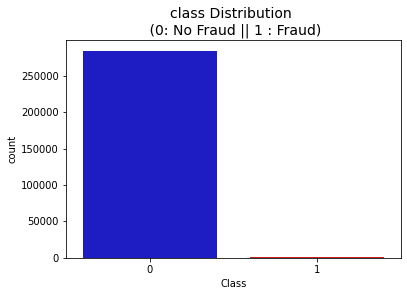

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data = df, palette = colors)
plt.title('class Distribution \n (0: No Fraud || 1 : Fraud)', fontsize = 14)

In [6]:
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'], axis = 1, inplace = True)

In [7]:
scaled_amount = df['scaled_amount']
df.drop(['scaled_amount'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)

In [8]:
df.head()

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,...,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,...,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,...,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,...,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,...,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [9]:
ss = StratifiedShuffleSplit(n_splits = 1,
                           test_size = 0.2,
                           train_size = 0.8,
                           random_state = 50)

In [13]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [14]:
for train_index, test_index in ss.split(x, y):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

In [15]:
train_df

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
221234,-0.293440,142486.0,2.126322,-0.010040,-1.997102,0.276477,0.639165,-0.755860,0.445171,-0.305989,0.707746,-0.048368,-1.433705,-0.086572,-0.743952,...,-0.166958,-0.620654,-0.237470,-0.376476,0.421955,-0.275343,-0.048907,0.047566,0.023506,0.335408,0.420944,-0.226205,-0.045156,-0.066126,0
53575,-0.135401,46051.0,1.100318,0.177618,0.212730,0.966039,-0.232896,-0.122320,-0.236608,0.158837,0.274970,-0.657439,1.762968,1.170186,-0.072109,...,-0.725100,-0.063234,1.223388,-0.014856,-0.164803,-0.085843,-0.084915,0.007497,-0.056042,0.169951,0.425441,0.410297,0.015957,0.032014,0
163269,-0.125900,115806.0,-0.565880,0.135593,1.400824,-2.647515,0.858462,-0.121119,0.654774,-0.243942,-1.344053,-0.233874,-1.092282,-0.653155,1.122113,...,-0.245356,1.372909,-0.452111,-1.752122,0.417801,0.272824,-0.330358,-1.037985,-0.215048,-0.015207,0.432703,-0.668484,-0.170773,-0.167245,0
246069,0.009642,153023.0,-1.610536,1.450172,-1.164202,-1.269844,1.317395,2.602690,-0.595004,-0.075000,-0.517055,-0.928533,0.175939,0.779412,-0.705652,...,-0.188568,-0.745326,0.754119,-1.602158,-0.770807,-0.844192,1.565997,-0.560198,0.291749,-1.730249,-0.701429,0.344150,-0.134201,0.013732,0
198872,-0.200796,132691.0,-1.124829,1.615882,-0.246758,-1.007567,0.794176,-0.388234,0.852613,0.162459,-0.272138,-0.302465,-1.670722,0.737696,1.807066,...,-0.423457,0.091765,-0.632465,-0.648212,0.327819,0.123248,-0.252198,-0.636616,-0.118839,-1.025058,-0.115831,0.224957,0.035447,0.208210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21691,-0.296793,31809.0,-0.866737,0.793163,0.791631,-0.019310,1.675213,4.374922,-0.837459,1.629948,-0.119717,-0.806754,-0.943760,0.160261,-0.122734,...,-0.040093,-0.137833,-0.052083,0.435113,1.285984,0.027757,-0.138033,-0.418125,-0.257635,1.004318,0.445748,-0.304825,0.010633,0.020619,0
226406,1.087543,144613.0,-0.897157,-0.305330,0.001853,-2.283739,-0.794812,0.796014,-0.092902,0.030927,-1.607350,1.372831,-0.384317,0.083809,0.836058,...,-2.907584,-1.261566,0.771743,-0.040003,1.489261,-0.620535,-0.413706,-0.415258,0.075932,0.205978,-0.592265,-0.436177,-0.638159,-0.111313,0
23564,-0.257249,32822.0,-0.459635,0.752513,1.754365,0.571020,0.284946,-0.071830,0.366709,0.124772,-0.744549,-0.337445,0.488449,0.452742,0.526814,...,1.797954,-0.893923,0.618390,-1.286060,0.161953,0.085457,-0.051137,-0.108876,0.133992,0.106714,-0.720905,0.213609,0.140315,0.140501,0
88109,2.040103,61990.0,0.943566,-1.034119,0.974853,0.648536,-1.377906,0.329313,-0.844338,0.192469,-0.589187,0.820355,0.461294,0.513435,0.104957,...,-0.208448,-0.878728,-0.505563,2.048257,-0.799348,-0.206620,-0.262192,-0.556690,-0.103136,-0.036042,0.216285,-0.409985,0.055953,0.057321,0


In [16]:
print('Distributions: \n')
print("Train Set")
print(train_df.Class.value_counts())
print("\nTest Set")
print(test_df.Class.value_counts())
print("\nPercentage:")
print("\nTrain Set")
print((train_df.Class.value_counts()/ len(train_df))*100)
print("\nTest Set")
print((test_df.Class.value_counts()/ len(test_df))*100)

Distributions: 

Train Set
0    227451
1       394
Name: Class, dtype: int64

Test Set
0    56864
1       98
Name: Class, dtype: int64

Percentage:

Train Set
0    99.827075
1     0.172925
Name: Class, dtype: float64

Test Set
0    99.827955
1     0.172045
Name: Class, dtype: float64


### Random Under-Sampling:

In [17]:
train_df = train_df.sample(frac = 1)

In [18]:
fraud_df = train_df.loc[train_df['Class'] == 1]
non_fraud_df = train_df.loc[train_df['Class'] == 0][:394]    

In [19]:
fraud_df.shape
non_fraud_df.shape

(394, 31)

In [20]:
normal_df = pd.concat([fraud_df, non_fraud_df])

In [21]:
df2 = normal_df.sample(frac = 1, random_state = 42)

In [22]:
df2.head(10)

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
152432,0.237546,97370.0,1.992704,-0.483710,-0.176999,0.346434,-0.500236,0.149135,-0.917126,-0.035165,2.642922,-0.418725,-0.751104,-2.167843,2.649293,...,0.039279,0.909422,-0.313826,0.564502,-0.136960,-0.086745,-0.159819,-0.085397,0.169697,-1.018751,-0.472756,0.499998,-0.041709,-0.048148,0
44556,-0.293440,41991.0,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,-2.424414,-5.699922,3.586824,-6.636229,-1.128176,...,0.638326,-6.856810,-8.851879,-4.591883,0.936940,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1
251904,1.017537,155554.0,-1.040067,3.106703,-5.409027,3.109903,-0.887237,-2.497522,-2.073347,0.639818,-3.013331,-5.954838,3.586395,-5.517148,0.683652,...,1.856095,-4.878248,-4.335998,-1.377191,3.057382,1.054390,0.773961,0.214868,-0.184233,-0.284091,0.493467,0.732329,0.675067,0.337076,1
142405,-0.135401,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,-8.745973,5.416042,-8.164125,-0.165011,...,-1.895210,-7.360475,-14.668771,-4.877119,1.385610,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,1
40525,-0.293440,40276.0,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,-2.042168,1.844093,-2.425933,-1.584275,...,0.459828,2.375296,6.443510,2.591846,-2.889770,-0.059264,-0.176541,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,1
150679,1.146231,93879.0,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,-4.337713,-15.563791,7.610820,-15.592323,0.504789,...,-0.796526,-10.342328,-16.044524,-5.882136,1.573698,-1.378923,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,1
36256,0.241319,38460.0,-0.667145,-0.807262,1.369922,-0.602658,0.068033,-1.218242,-0.461744,-0.019050,-1.726484,0.711538,1.361146,0.778441,1.005794,...,0.243209,-1.463200,-0.067056,1.497375,0.212339,-0.001391,-0.160926,-0.299673,0.425849,0.558838,-1.159587,0.804863,0.106713,0.206885,0
45732,-0.293440,42474.0,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,-3.945843,-4.565252,4.097216,-5.450916,-0.965693,...,0.526948,-1.139754,0.835640,0.389774,-1.439608,0.054796,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050,1
42609,0.857682,41170.0,-6.498086,4.750515,-8.966558,7.098854,-6.958376,-2.822126,-10.333406,4.031907,-6.648778,-11.634414,6.877571,-13.697686,0.463040,...,-0.309229,-12.317580,-24.019099,-9.335193,1.951890,0.568338,2.158143,0.111510,0.216414,0.584661,0.760360,0.081972,1.415068,0.035124,1
154693,-0.293440,102619.0,-2.488363,4.359019,-7.776410,5.364027,-1.823877,-2.445140,-4.964221,1.484890,-2.947899,-7.175350,7.343652,-10.178996,2.142151,...,-0.473746,-8.143342,-9.785677,-3.086520,3.379713,0.792275,1.325672,1.021226,-0.266476,-0.370880,0.365535,0.081372,0.184983,-0.211582,1


###  Equally Distributing 

In [23]:
print(df2['Class'].value_counts()/len(df2))

0    0.5
1    0.5
Name: Class, dtype: float64


/home/abhishek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'class Distribution \n (0: No Fraud || 1 : Fraud)')

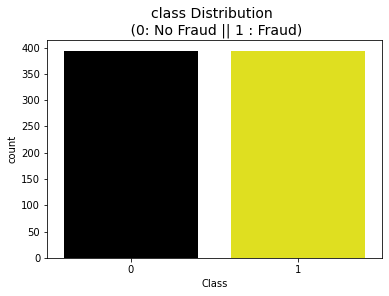

In [24]:
colors = ["Black", "Yellow"]

sns.countplot('Class', data = df2, palette = colors)
plt.title('class Distribution \n (0: No Fraud || 1 : Fraud)', fontsize = 14) 

## Pre-Processing the data

In [40]:
x_train = df2.drop('Class', axis = 1)
y_train = df2['Class']

In [41]:
x_test = test_df.drop('Class', axis = 1)
y_test = test_df['Class']

In [42]:
clf = GaussianNB()
clf.fit(x_train, y_train.values.ravel())

GaussianNB()

In [43]:
predictions = clf.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
print('Accuracy Score :', accuracy_score(predictions, y_test))

Accuracy Score : 0.9893437730416769
